<a href="https://colab.research.google.com/github/SanghunOh/with_data_analytics/blob/main/codes/%EC%8B%9C%EB%8F%84%EB%B3%84_%EC%B4%9D_%EC%9D%B8%EA%B5%AC%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###from https://jumin.mois.go.kr/index.jsp > 주민등록 인구 및 세대현황 -> 전체읍면동현황

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [3]:
import pandas as pd
read_df = pd.read_csv('./202206_202206_주민등록인구및세대현황_월간.csv', encoding='cp949')

read_df

,행정구역,2022년06월_총인구수,2022년06월_세대수,2022년06월_세대당 인구,2022년06월_남자 인구수,2022년06월_여자 인구수,2022년06월_남여 비율
0,서울특별시 (1100000000),"9,494,807","4,464,840",2.13,"4,605,655","4,889,152",0.94
1,서울특별시 종로구 (1111000000),"143,624","73,728",1.95,"69,513","74,111",0.94
2,서울특별시 종로구 청운효자동(1111051500),"11,803","5,210",2.27,"5,430","6,373",0.85
3,서울특별시 종로구 사직동(1111053000),"9,310","4,674",1.99,"4,154","5,156",0.81
4,서울특별시 종로구 삼청동(1111054000),"2,386","1,193",2.00,"1,130","1,256",0.90
...,...,...,...,...,...,...,...
3860,제주특별자치도 서귀포시 서홍동(5013058000),"11,254","4,644",2.42,"5,556","5,698",0.98
3861,제주특별자치도 서귀포시 대륜동(5013059000),"15,411","6,923",2.23,"7,802","7,609",1.03
3862,제주특별자치도 서귀포시 대천동(5013060000),"13,802","6,460",2.14,"6,980","6,822",1.02
3863,제주특별자치도 서귀포시 중문동(5013061000),"12,217","5,903",2.07,"6,197","6,020",1.03


##데이터 정리

###컬럼명 정리

In [4]:
def replace_column_name(column_name, split_param='_'):
  split_list = column_name.split(split_param)
  result = split_list[len(split_list)-1]
  return result

In [5]:
read_df.columns = list(map(replace_column_name,list(read_df.columns)))

In [6]:
read_df

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),"9,494,807","4,464,840",2.13,"4,605,655","4,889,152",0.94
1,서울특별시 종로구 (1111000000),"143,624","73,728",1.95,"69,513","74,111",0.94
2,서울특별시 종로구 청운효자동(1111051500),"11,803","5,210",2.27,"5,430","6,373",0.85
3,서울특별시 종로구 사직동(1111053000),"9,310","4,674",1.99,"4,154","5,156",0.81
4,서울특별시 종로구 삼청동(1111054000),"2,386","1,193",2.00,"1,130","1,256",0.90
...,...,...,...,...,...,...,...
3860,제주특별자치도 서귀포시 서홍동(5013058000),"11,254","4,644",2.42,"5,556","5,698",0.98
3861,제주특별자치도 서귀포시 대륜동(5013059000),"15,411","6,923",2.23,"7,802","7,609",1.03
3862,제주특별자치도 서귀포시 대천동(5013060000),"13,802","6,460",2.14,"6,980","6,822",1.02
3863,제주특별자치도 서귀포시 중문동(5013061000),"12,217","5,903",2.07,"6,197","6,020",1.03


In [7]:
read_df.dtypes

행정구역       object
총인구수       object
세대수        object
세대당 인구    float64
남자 인구수     object
여자 인구수     object
남여 비율     float64
dtype: object

In [8]:
change_dtype_columns = ['총인구수','세대수', '남자 인구수', '여자 인구수']
for column in change_dtype_columns:
  read_df[column] = read_df[column].str.replace(',','').astype('int64')
read_df  

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9494807,4464840,2.13,4605655,4889152,0.94
1,서울특별시 종로구 (1111000000),143624,73728,1.95,69513,74111,0.94
2,서울특별시 종로구 청운효자동(1111051500),11803,5210,2.27,5430,6373,0.85
3,서울특별시 종로구 사직동(1111053000),9310,4674,1.99,4154,5156,0.81
4,서울특별시 종로구 삼청동(1111054000),2386,1193,2.00,1130,1256,0.90
...,...,...,...,...,...,...,...
3860,제주특별자치도 서귀포시 서홍동(5013058000),11254,4644,2.42,5556,5698,0.98
3861,제주특별자치도 서귀포시 대륜동(5013059000),15411,6923,2.23,7802,7609,1.03
3862,제주특별자치도 서귀포시 대천동(5013060000),13802,6460,2.14,6980,6822,1.02
3863,제주특별자치도 서귀포시 중문동(5013061000),12217,5903,2.07,6197,6020,1.03


##시도별 서브셋 만들기

In [9]:
administrative_df = read_df[read_df['행정구역'].str.contains('00000000')].copy()

In [10]:
administrative_df

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9494807,4464840,2.13,4605655,4889152,0.94
452,부산광역시 (2600000000),3336737,1556938,2.14,1630944,1705793,0.96
674,대구광역시 (2700000000),2375306,1070705,2.22,1169571,1205735,0.97
827,인천광역시 (2800000000),2957066,1313975,2.25,1480432,1476634,1.00
1000,광주광역시 (2900000000),1435378,650131,2.21,709685,725693,0.98
1103,대전광역시 (3000000000),1448401,670279,2.16,722517,725884,1.00
1191,울산광역시 (3100000000),1115609,485652,2.30,573152,542457,1.06
1253,세종특별자치시 (3600000000),380215,158258,2.40,189723,190492,1.00
1277,경기도 (4100000000),13585967,5898050,2.30,6838396,6747571,1.01
1894,강원도 (4200000000),1539064,753336,2.04,774405,764659,1.01


In [11]:
administrative_df['시도'] = administrative_df['행정구역'].str.split(' ').str[0]
administrative_df

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도
0,서울특별시 (1100000000),9494807,4464840,2.13,4605655,4889152,0.94,서울특별시
452,부산광역시 (2600000000),3336737,1556938,2.14,1630944,1705793,0.96,부산광역시
674,대구광역시 (2700000000),2375306,1070705,2.22,1169571,1205735,0.97,대구광역시
827,인천광역시 (2800000000),2957066,1313975,2.25,1480432,1476634,1.00,인천광역시
1000,광주광역시 (2900000000),1435378,650131,2.21,709685,725693,0.98,광주광역시
1103,대전광역시 (3000000000),1448401,670279,2.16,722517,725884,1.00,대전광역시
1191,울산광역시 (3100000000),1115609,485652,2.30,573152,542457,1.06,울산광역시
1253,세종특별자치시 (3600000000),380215,158258,2.40,189723,190492,1.00,세종특별자치시
1277,경기도 (4100000000),13585967,5898050,2.30,6838396,6747571,1.01,경기도
1894,강원도 (4200000000),1539064,753336,2.04,774405,764659,1.01,강원도


###총 인구수로 시각화

In [12]:
administrative_df.sort_values('총인구수', ascending=False, inplace=True)

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [14]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

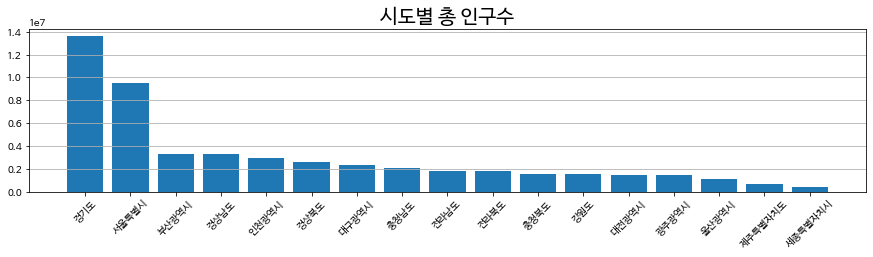

In [15]:
plt.rcParams['figure.figsize']=(15,3)
plt.bar(administrative_df['시도'], administrative_df['총인구수'])
plt.xticks(rotation=45)
plt.title('시도별 총 인구수', size=20)
plt.grid(axis='y')
plt.show()

###seaborn 사용

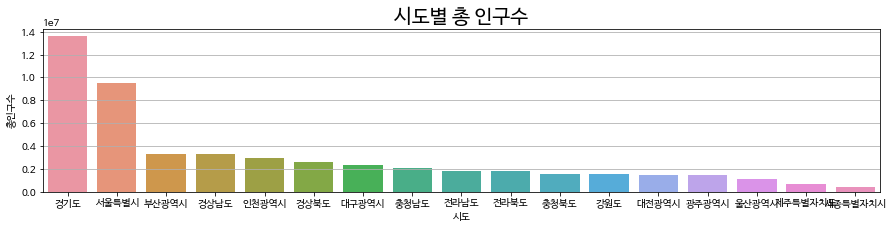

In [16]:
import seaborn as sns
sns.barplot(data=administrative_df, x='시도', y='총인구수')
plt.title('시도별 총 인구수', size=20)
plt.grid(axis='y')
plt.show()

###파이그래프 

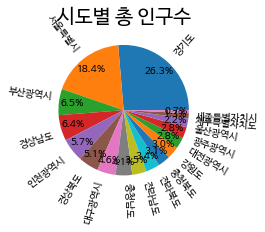

In [17]:
plt.pie(administrative_df['총인구수'], labels=administrative_df['시도'],
        autopct='%.1f%%', pctdistance=0.8, rotatelabels=True)
plt.title('시도별 총 인구수', size=20)
plt.show()

##시도별 세대당 인구수 시각화

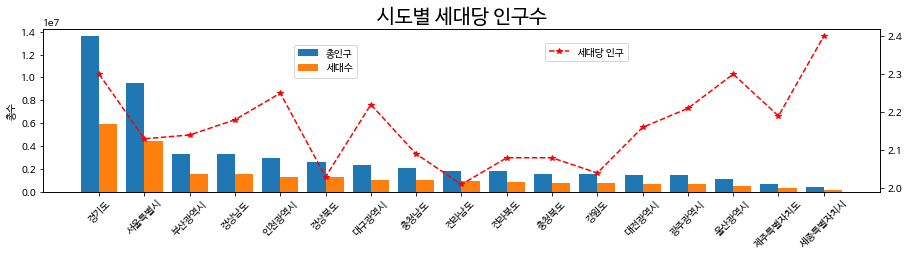

In [32]:
fig, ax1 = plt.subplots()

ax1.bar(administrative_df['시도'], administrative_df['총인구수'], align='edge', width=-0.4, label='총인구')
ax1.bar(administrative_df['시도'], administrative_df['세대수'], align='edge', width=0.4, label='세대수')
# ax1.legend(loc='upper left')
ax1.legend(loc=(0.3, 0.7))
ax1.set_ylabel('총수')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(administrative_df['시도'], administrative_df['세대당 인구'], 'r*--', label='세대당 인구')
# ax2.legend(loc='upper right')
ax2.legend(loc=(0.6, 0.8))

plt.title('시도별 세대당 인구수', size=20)
plt.show()

##시도별 성별 인구수 시각화

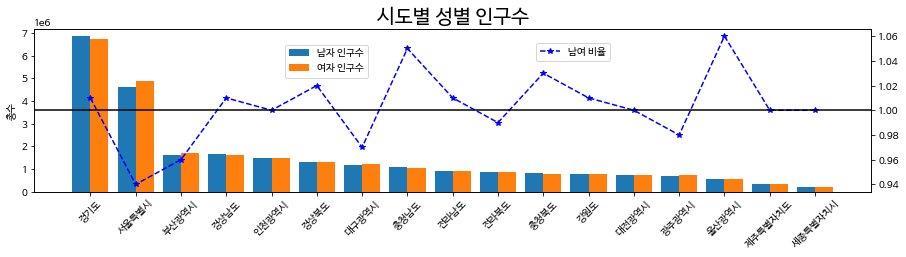

In [36]:
fig, ax1 = plt.subplots()


ax1.bar(administrative_df['시도'], administrative_df['남자 인구수'], align='edge', width=-0.4, label='남자 인구수')
ax1.bar(administrative_df['시도'], administrative_df['여자 인구수'], align='edge', width=0.4, label='여자 인구수')
ax1.legend(loc=(0.3, 0.7))
ax1.set_ylabel('총수')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(administrative_df['시도'], administrative_df['남여 비율'], 'b*--', label='남여 비율')
ax2.legend(loc=(0.6, 0.8))
ax2.axhline(1, color='k')

plt.title('시도별 성별 인구수', size=20)
plt.show()

###지역별 인구수 차이

In [38]:
administrative_df['성별 인구 차이'] = administrative_df['남자 인구수'] - administrative_df['여자 인구수']

In [40]:
administrative_df.sort_values('성별 인구 차이', ascending=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


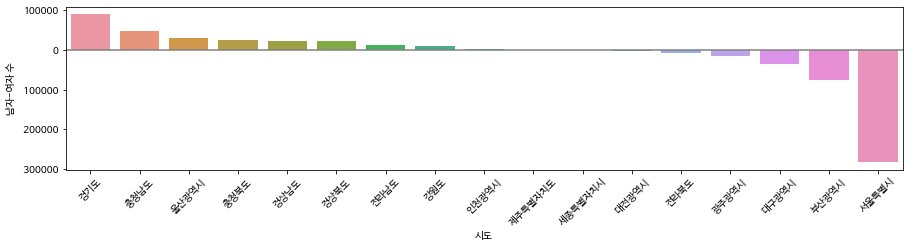

In [44]:
sns.barplot(data=administrative_df, x='시도', y='성별 인구 차이')
plt.xticks(rotation=45)
plt.axhline(0, color='gray')
plt.ylabel('남자-여자 수')
plt.show()

##서울시 구별/동별 인구수 분석